# Customer Churn Prediction at Vodafone

## `Business Understanding`
Vodafone is a global telecommunications company operating in numerous countries, providing mobile and fixed-line telecommunication services to millions of customers worldwide.

`Problem statement:` Vodafone faces tough competition and wants to know how likely customers are to leave and why. Keeping customers despite churn needs smart strategies. Vodafone aims to keep its current customers happy and attract new ones in this competitive market by understanding these challenges.

`Goal:` The primary goal of this project is to develop a machine learning model capable of predicting the likelihood of customer churn within Vodafone's customer base. Additionally, the project aims to identify key indicators of customer churn and devise effective retention strategies to reduce the rate of customers leaving. By leveraging data-driven insights, this project seeks to enhance customer retention rates.

### `Hypothesis`
`Null:` There is no correlation between customer contract and customer churn

`Alternative:` There is a correlation between customer contract and customer churn

### Project Plan (4 Weeks)
Week 1
- Title and description of the project
- Clearly stated hypothesis
- At least 3 questions
- Exploratory data analysis of the data provided
- Issues with the data
- How you are going to handle each issue identified

Week 2
- Explore the various kinds of models that can be used for the project
- Build and select the right model

### `Research Questions`
- What proportion of customers are male and what proportion are female?
- Do customers with dependants tend to have multiple lines?
- What payment method are customers likely to use?
- What is the average tenure of customers who churn compared to those who don't?
- Are customers with multiple lines more or less likely to churn compared to those without?


## `Data Understanding`

### Import necessary packages

In [49]:
import pyodbc
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import os
import warnings
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')
print("Activated")

Activated


In [50]:
# Load environment variables from .env file
load_dotenv()
 
# Access environment variables
db_server = os.getenv("DB_SERVER")
db_login = os.getenv("DB_LOGIN")
db_password = os.getenv("DB_PASSWORD")
db_name = os.getenv("DB_NAME")
 
# Connection string
connection_string = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={db_server};DATABASE={db_name};UID={db_login};PWD={db_password}"
 

In [51]:
# Connect to the database
connection = pyodbc.connect(connection_string)

### Load Datasets

In [52]:
# Write query to access table from the database
query_2020 = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

# Read data from SQL into a pandas DataFrame
data1 = pd.read_sql(query_2020, connection)

# Display first 5 rows of dataset
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [53]:
data2 = pd.read_csv(r'./data/LP2_Telco-churn-second-2000.csv')

data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [54]:
data3 = pd.read_excel(r'./data/Telco-churn-last-2000.xlsx')

data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### Data Inspection

In [67]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [68]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [73]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [80]:
# Unique value for SeniorCitizens
print(f'data1 ==> {data1.SeniorCitizen.unique()}')
print(f'data2 ==> {data2.SeniorCitizen.unique()}')
print(f'data3 ==> {data3.SeniorCitizen.unique()}')

data1 ==> [False  True]
data2 ==> [0 1]
data3 ==> [0 1]


In [148]:
# Check for inconsistencies in unique values for specific columns in each dataset
print('Unique Values For Specific Columns In Each Dataset')
print('__________________________________________________')
print(f'SeniorCitizens: data1{data1.SeniorCitizen.unique()}, data2{data2.SeniorCitizen.unique()}, data3{data3.SeniorCitizen.unique()}')
print(f'\nPartner: data1{data1.Partner.unique()}, data2{data2.Partner.unique()}, data3{data3.Partner.unique()}')
print(f'\nDependents: data1{data1.Dependents.unique()}, data2{data2.Dependents.unique()}, data3{data3.Dependents.unique()}')
print(f'\nPhoneService: data1{data1.PhoneService.unique()}, data2{data2.PhoneService.unique()}, data3{data3.PhoneService.unique()}')
print(f'\nMultipleLines: data1{data1.MultipleLines.unique()}, data2{data2.MultipleLines.unique()}, data3{data3.MultipleLines.unique()}')
print(f'\nOnlineBackup: data1{data1.OnlineBackup.unique()}, data2{data2.OnlineBackup.unique()}, data3{data3.OnlineBackup.unique()}')
print(f'\nDeviceProtection: data1{data1.DeviceProtection.unique()}, data2{data2.DeviceProtection.unique()}, data3{data3.DeviceProtection.unique()}')
print(f'\nTechSupport: data1{data1.TechSupport.unique()}, data2{data2.TechSupport.unique()}, data3{data3.TechSupport.unique()}')
print(f'\nStreamingTV: data1{data1.StreamingTV.unique()}, data2{data2.StreamingTV.unique()}, data3{data3.StreamingTV.unique()}')
print(f'\nStreamingMovies: data1{data1.StreamingMovies.unique()}, data2{data2.StreamingMovies.unique()}, data3{data3.StreamingMovies.unique()}')
print(f'\nPaperlessBilling: data1{data1.PaperlessBilling.unique()}, data2{data2.PaperlessBilling.unique()}, data3{data3.PaperlessBilling.unique()}')
print(f'\nChurn: data1{data1.Churn.unique()}, data2{data2.Churn.unique()}')


Unique Values For Specific Columns In Each Dataset
__________________________________________________
SeniorCitizens: data1[False  True], data2[0 1], data3[0 1]

Partner: data1[ True False], data2['No' 'Yes'], data3['No' 'Yes']

Dependents: data1[False  True], data2['No' 'Yes'], data3['No' 'Yes']

PhoneService: data1[False  True], data2['Yes' 'No'], data3['Yes' 'No']

MultipleLines: data1[None False True], data2['No' 'No phone service' 'Yes'], data3['Yes' 'No' 'No phone service']

OnlineBackup: data1[True False None], data2['No' 'Yes' 'No internet service'], data3['No' 'No internet service' 'Yes']

DeviceProtection: data1[False True None], data2['No' 'Yes' 'No internet service'], data3['No' 'No internet service' 'Yes']

TechSupport: data1[False True None], data2['Yes' 'No' 'No internet service'], data3['No' 'No internet service' 'Yes']

StreamingTV: data1[False True None], data2['No' 'Yes' 'No internet service'], data3['Yes' 'No internet service' 'No']

StreamingMovies: data1[False Tru

'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling' and 'Churn'

In [144]:
data1[data1['Churn'] == '']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [126]:
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [145]:
data1.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [71]:
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Issues with the Data

Data1
- Columns 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'TotalCharges' and 'Churn' have some Null Values with 'TotalCharges' having five Null values and 'Churn' having just one Null value.

Data2
- Colums 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService' and 'PaperlessBilling' in have dtypes as int and object which are different from same columns in data1 having dtypes as boolean.
- Also, column 'TotalCharges' has dtype as object and should be converted to a float like that in data1.

Data3
- Colums 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService' and 'PaperlessBilling' in have dtypes as int and object which are different from same columns in data1 having dtypes as boolean.
- Again, column 'TotalCharges' has dtype as object and should be converted to a float like that in data1.

The columns 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling' and 'Churn' have different values in data1, data2 and data3.

### Exploratory Data Analysis - EDA

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [ ]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


In [ ]:
data1.duplicated().sum()

0

In [ ]:
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

#### Univariate Analysis

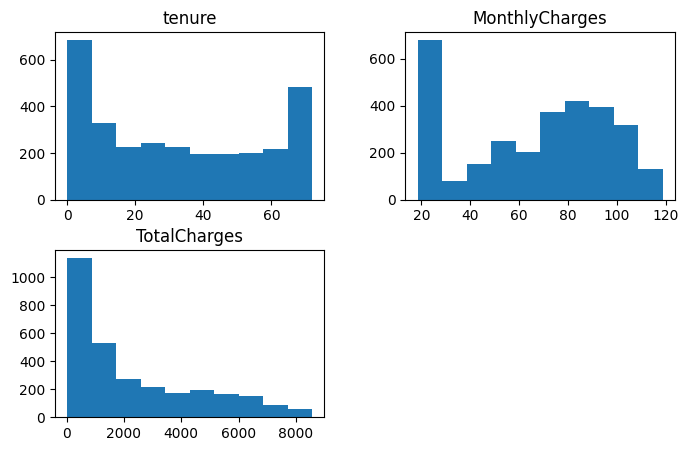

In [ ]:
data1.hist(figsize=(8, 5), grid=False)
plt.show()

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [ ]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2043.0,0.168380,0.374295,0.00,0.000,0.00,0.000,1.00
tenure,2043.0,32.649046,24.376248,0.00,9.000,30.00,55.000,72.00
MonthlyCharges,2043.0,64.712555,29.970010,18.55,35.825,70.25,89.625,118.35


In [ ]:
data2.duplicated().sum()

0

In [ ]:
data2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data2[data2['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
1670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [ ]:
# Replace non-numeric values with NaN
data2['TotalCharges'] = pd.to_numeric(data2['TotalCharges'], errors='coerce')

# Convert the 'TotalCharges' column to float
data2['TotalCharges'] = data2['TotalCharges'].astype(float)

# Check for the datatype and total null values
print(data2['TotalCharges'].dtype)
print(data2['TotalCharges'].isnull().sum())


float64
3


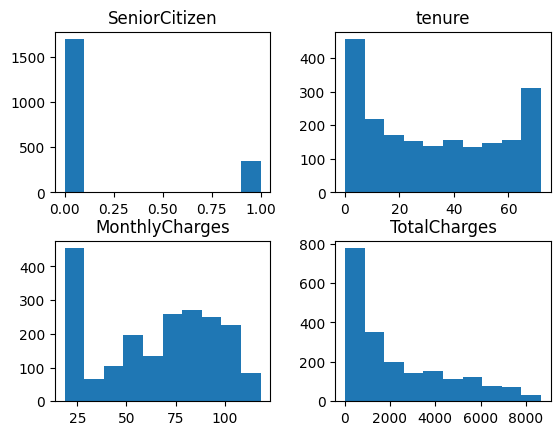

In [ ]:
data2.hist(grid=False)

plt.show()

In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # Create a scaler object for standardization
# scaler_standard = StandardScaler()
# # Standardize the features
# subset_df_standardized = dataset1.copy()
# subset_df_standardized[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler_standard.fit_transform(dataset1[['tenure', 'MonthlyCharges', 'TotalCharges']])

# # Create a scaler object for min-max scaling
# scaler_minmax = MinMaxScaler()
# # Min-max scale the features
# subset_df_minmax = dataset1.copy()
# subset_df_minmax[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler_minmax.fit_transform(dataset1[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [ ]:
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Findings
dataset1
- There are some null values in dataset1
- The features are not on the same scale especially with `TotalCharges`
dataset2
- The features are not on the same scale
- The 'TotalCharges' column contain non-numeric values such as empty strings
- TotalCharges column is an object, should be converted to a float


In [ ]:
data1['TotalCharges'].isna().sum()

5